<h3> Vaccination Status and Population Density as Predictors for COVID-19 Mortality Rates: 
A Global Study </h3>

<h3> Project Phase 4 </h3>

<h5> Completed By:  Ananya, Antonio, Maxx, Hamsini </h5>

In [1]:
# import necessary packages:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.inspection import permutation_importance 
from sklearn.model_selection import GridSearchCV

sns.set()

<h3> LOAD DATA </h3>

In [2]:
# Load the data from the dataset into a dataframe:

# retrives the data from the url of the dataset and loads it into a dataframe with the given columns
url = 'owid-covid-data.csv'
df = pd.read_csv(url)[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', \
                                           'total_deaths', 'new_deaths', 'human_development_index', 'total_vaccinations', \
                                           'people_fully_vaccinated', 'new_vaccinations', 'population', 'population_density']]

### INSPECT THE DATA

In [3]:
# Inspect the data:

# identifies and displays the number of rows and columns (dimensions) in the data file
num_observations = df.shape[0]
num_columns = df.shape[1]
print("There are {} number of observations/rows and {} number of columns in the covid data file.".format(num_observations, num_columns))

There are 223556 number of observations/rows and 14 number of columns in the covid data file.


In [4]:
# identifies and displays the first 5 values from the dataset to give us a better understanding of the data 
print("Variable types for each column in the covid data file:")
print(df.head())

Variable types for each column in the covid data file:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   total_deaths  new_deaths  human_development_index  total_vaccinations  \
0           NaN         NaN                    0.511                 NaN   
1           NaN         NaN                    0.511                 NaN   
2           NaN         NaN                    0.511                 NaN   
3           NaN         NaN                    0.511                 NaN   
4           NaN         NaN                    0.511                 NaN   

   people_fully_vaccinated  new_vaccinations  pop

In [5]:
# identifies and displays the data types for all the columns in the data file 
print("Variable types for each column in the covid data file:")
print(df.info())

Variable types for each column in the covid data file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223556 entries, 0 to 223555
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   iso_code                 223556 non-null  object 
 1   continent                210714 non-null  object 
 2   location                 223556 non-null  object 
 3   date                     223556 non-null  object 
 4   total_cases              214380 non-null  float64
 5   new_cases                214156 non-null  float64
 6   total_deaths             195224 non-null  float64
 7   new_deaths               195184 non-null  float64
 8   human_development_index  178732 non-null  float64
 9   total_vaccinations       62332 non-null   float64
 10  people_fully_vaccinated  56832 non-null   float64
 11  new_vaccinations         51194 non-null   float64
 12  population               222259 non-null  float64
 13  popu

As we can see from the output, the variables have suitable types except for:

- iso_code which should be a string instead of object since it is a code for a country represented by a collection of letters
- continent should also be a string as it represents a name of a continent
- location should also be a string as it represents a name of a certain country/location
- date should be a date-time object since it represents a certain date
- the following columns can be converted into ints instead of floats since they are represented as whole numbers: total_cases, new_cases, total_deaths, new_deaths, total_vaccinations, people_fully_vaccinated, new_vaccinations, and population

In [6]:
# Missing values:

# displays the frequency of null values for each of the columns in the data file:
print("Frequency of null values for each column in the covid data file:")
print(df.isna().sum())
print()

# shows the frequency of missing values for each row and displays it in descending order
print("Displays the frequency/number of missing values for each row in the df:")
print(df.isnull().sum(axis = 1).sort_values(ascending = False))
print()

# shows the number of rows for each frequency of missing values
print('Displays the number of rows for each frequency of missing values:')
print(df.isnull().sum(axis = 1).sort_values(ascending = True).value_counts(ascending = True))
print()

Frequency of null values for each column in the covid data file:
iso_code                        0
continent                   12842
location                        0
date                            0
total_cases                  9176
new_cases                    9400
total_deaths                28332
new_deaths                  28372
human_development_index     44824
total_vaccinations         161224
people_fully_vaccinated    166724
new_vaccinations           172362
population                   1297
population_density          24992
dtype: int64

Displays the frequency/number of missing values for each row in the df:
149924    10
150012    10
149991    10
149990    10
149989    10
          ..
28415      0
191953     0
191954     0
28414      0
111778     0
Length: 223556, dtype: int64

Displays the number of rows for each frequency of missing values:
10       291
9       2151
2       3376
8       5139
6       6324
7       7185
4      13463
1      14083
5      14458
0      36770
3   

Since we have thousands of rows of data to work with, we can simply remove the columns that contain null values.

<h3> EDA </h3>

In [7]:
# Handle missing values:

# displays the initial dimensions of the dataset before any deletions or imputations
print("Initial number of observations: {}".format(df.shape[0]))
print("Initial number of columns: {}".format(df.shape[1]))
print()

# drops any observations that contains any null values
df.dropna(inplace = True)

# displays the dimensions of the dataset after any deletions or imputations
print("Number of observations After Deletion: {}".format(df.shape[0]))
print("Number of columns After Deletion: {}".format(df.shape[1]))

Initial number of observations: 223556
Initial number of columns: 14

Number of observations After Deletion: 36770
Number of columns After Deletion: 14


We see that after deletion, we still have 36,770 rows to work with which is plentiful amounts of data to train on. 

In [8]:
# Changing variables to have suitable data types:

# checks and displays the data types of all columns before type conversion
print("Before data type conversion:")
print(df.info())
print()

# converts the types of the columns to more suitable data types
df['iso_code'] = df['iso_code'].astype('string')
df['continent'] = df['continent'].astype('string')
df['location'] = df['location'].astype('string')

df['date'] = df['date'].astype('datetime64[ns]')

changeInt = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_fully_vaccinated', 'new_vaccinations', 'population']

for column in changeInt:
    df[column] = df[column].astype('int')
    
# checks and displays the data types of all columns after type conversion
print("After data type conversion:")
print(df.info())
print()

Before data type conversion:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36770 entries, 458 to 223545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 36770 non-null  object 
 1   continent                36770 non-null  object 
 2   location                 36770 non-null  object 
 3   date                     36770 non-null  object 
 4   total_cases              36770 non-null  float64
 5   new_cases                36770 non-null  float64
 6   total_deaths             36770 non-null  float64
 7   new_deaths               36770 non-null  float64
 8   human_development_index  36770 non-null  float64
 9   total_vaccinations       36770 non-null  float64
 10  people_fully_vaccinated  36770 non-null  float64
 11  new_vaccinations         36770 non-null  float64
 12  population               36770 non-null  float64
 13  population_density       36770 non-null  flo

Now, we will convert the values of vaccinations and deaths into rates per population. This is because, if we simply give the total number of those fully vaccinated, our model will become more dependent on the factors of the population rather than the rates of vaccination or deaths itself.

In [9]:
# Change values in columns to represent rates:

# convert the values from the column representing the people fully vaccinated into rates of vaccinations
for i in df['people_fully_vaccinated'].index:
    df['people_fully_vaccinated'][i] = df['people_fully_vaccinated'][i]/df['population'][i]
    
# convert the values from the column representing the total vaccinations into rates of vaccinations
for i in df['total_vaccinations'].index:
    df['total_vaccinations'][i] = df['total_vaccinations'][i]/df['population'][i]
    
# convert the values from the column representing the total deaths into rates of deaths
for i in df['total_deaths'].index:
    df['total_deaths'][i] = df['total_deaths'][i]/df['population'][i]

### DATA VISUALIZATION

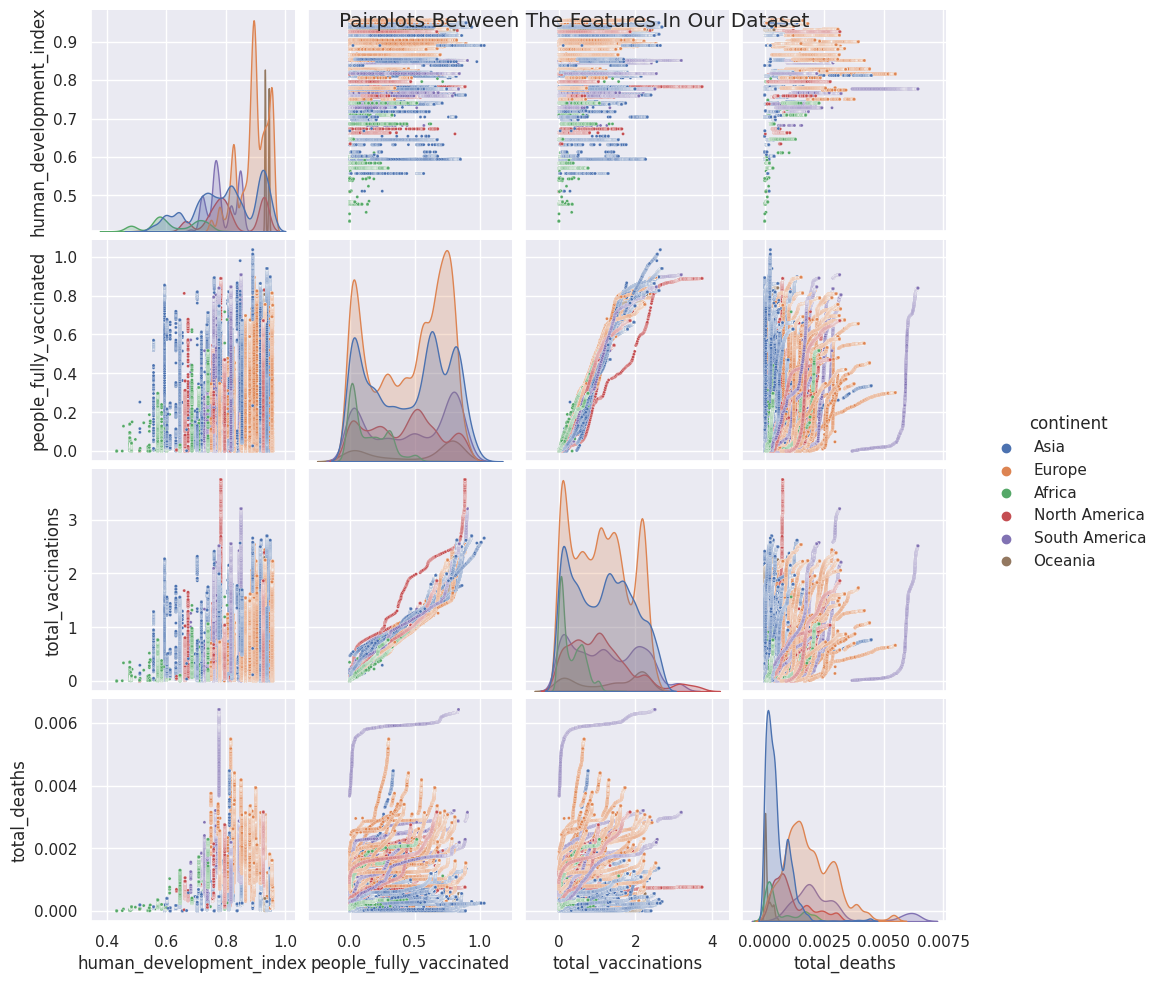

In [10]:
# Visualize the pairwise relationships between the features:

# uses the pairplot function from the seaborn library to create a plot for the pairwise relationships between the features where each color denotes one continent
pairplot = sns.pairplot(df[['human_development_index', 'people_fully_vaccinated', 'total_vaccinations', 'continent', 'total_deaths']], hue="continent", plot_kws={"s": 5})
pairplot.fig.suptitle('Pairplots Between The Features In Our Dataset')
plt.show()

From the above visualization, we can observe how each of the variables in the features compare to each other individually and how each of these relationships vary by the continent. Something interest to note is that as the human development index (HDI) increases, so does the number of people fully vaccinated and the number of total vacccinations. This makes sense as a higher HDI would correspond to a more developed country which would be more likely to vaccinate a higher number of people.

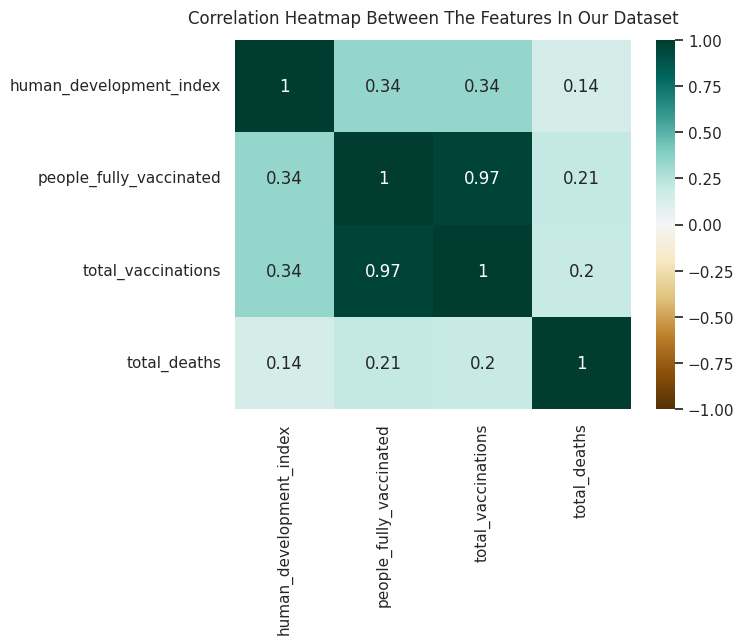

In [11]:
# Visualizes a correlation heatmap for the features being used for our models

# uses the heatmap function from the seaborn library to create a correlation map that represents the strength of the correlation between each pair of features
correlations = df[['human_development_index', 'people_fully_vaccinated', 'total_vaccinations', 'continent', 'total_deaths']].corr()
heatmap = sns.heatmap(correlations, vmin = -1, vmax = 1, annot = True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Between The Features In Our Dataset', fontdict = {'fontsize':12}, pad=12)
plt.show()

The above visualization represents the heatmap, or the correlation map, between each of the feature pairs of interest. It represents how strongly correlated a certain feature variable is to another one. The strength for the correlation between two features is represented by the correlation number (ranging between -1 to 1) and a color hue associated with the strength. As we can see from the above map, the correlation between the HDI and the number of people fully vaccinated and the total number of vaccinations seems to be high (0.34 and 0.35 respectively) compared to the rest of the correlativon relationships. This is in line with our observations from the previous graph.

<h3> MAKE TRAINING DATA SETS </h3>

In [12]:
# Create training and testing sets:

# extracts the needed columns for the input features and the target values
X = df[['human_development_index', 'people_fully_vaccinated', 'total_vaccinations']] # get the input features
y   = df['total_deaths']                                                             # get the target

# creates the training and test set for the features and targets
X_train, X_test, y_train, y_test = train_test_split(X,               # the input features
                                                    y,               # the label
                                                    test_size=0.05,  # set aside 5% of the data as the test set
                                                    random_state=7   # used for reproduce the results
                                                   )

In [13]:
# Normalize the numeric features:

# initializes and fits the standard scaler which we will use to normalize the numeric features in our dataset
scaler = StandardScaler()
scaler.fit(X_train[['human_development_index', 'people_fully_vaccinated', 'total_vaccinations']])

# scale the training data subset
X_train = scaler.transform(X_train[['human_development_index', 'people_fully_vaccinated', 'total_vaccinations']])

# scale the testing data subset
X_test = scaler.transform(X_test[['human_development_index', 'people_fully_vaccinated', 'total_vaccinations']])

<h3> MODELS </h3>

In [14]:
# Instantiates the function plotFeatures which will be used to plot the importance of each feature for each of the models built:

# creates a new function which takes in a certain type of regressor as an argument
def plotFeatures(regressor):
    
    # determines the importances of all the features when using the given regressor and extracts the features we are interested in
    importances = regressor.feature_importances_
    model_importances = pd.Series(importances, index=['human_development_index', 'people_fully_vaccinated', 'total_vaccinations'])
    
    # plots and displays a bar graph representing the features of interest and their corresponding importances using the given model
    fig, ax = plt.subplots()
    model_importances.plot.bar(ax=ax)
    ax.set_title("Feature Importances in Model")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

In [15]:
# Instantiates the function cross_validate which will be used to conduct cross validation on the given regressor to perform hyperparamater tuning:

# creates a new function which takes in a certain type of regressor and a dictionary representing the interested hyperparameter settings as arguments
def cross_validate(regressor, params):
    
    # instantiate and fit/train a grid search cv with the given parameter combinations
    grid = GridSearchCV(estimator = regressor, param_grid = params, cv = 5)
    grid.fit(X_train, y_train)
    
    return grid

<h4> Random Forest </h4>

In [16]:
# Hyperparameter tuning with random forest regressor:

# instantiates a random forest regressor object and a dictionary representing the parameter settings of interest with hyperparameter tuning
rf = RandomForestRegressor()
param_grid = { 
        'n_estimators': [75, 100, 150, 200],
    }

# finds the best grid through the cross_validate function defined above and determines the best parameter combinations used for the grid
best_grid = cross_validate(rf, param_grid)
best_params = best_grid.best_params_

# displays the combination of the best parameters and the best score
print("The most optimal hyperparamter combination is:", best_params)
print("The best score associated with this model is", round(best_grid.best_score_, 2))

The most optimal hyperparamter combination is: {'n_estimators': 200}
The best score associated with this model is 0.91


In [17]:
# Create a random forest model:

# instantiates a random forest regressor using the optimal hyperparameter combination and trains it with the training set
rf = RandomForestRegressor(n_estimators=best_params['n_estimators'])
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [18]:
# Evaluate the Predictions:

# determine the predicted target values made by the random forest model with the testing set
y_pred   = rf.predict(X_test)

# calculate and display the mean squared error for the random forest model when using the testing set
mse = mean_squared_error(y_test, y_pred)
print(f'The mse of the model is: {mse:.2e}')
print()

# calculate and display the accuracy for the random forest model when using the testing set
rf_score = rf.score(X_test, y_test)
print(f'The score of the model is {round(rf_score, 2)}')

The mse of the model is: 5.33e-08

The score of the model is 0.96


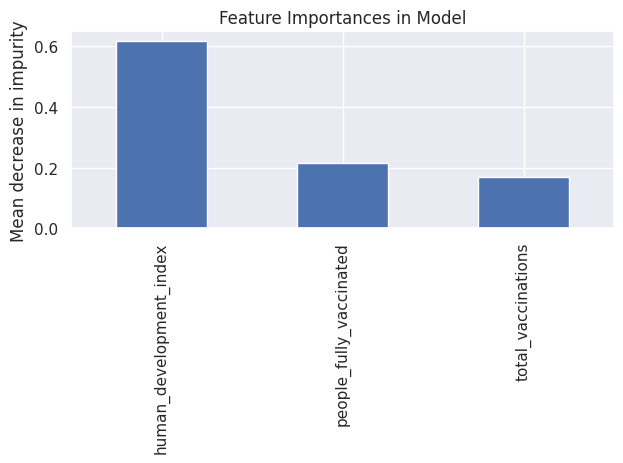

In [19]:
# visualize the feature importance for each feature of interest for the random forest model using the plotFeatures function
plotFeatures(rf)

From the above graph, we can see the importance each feature plays in building our model's predictions. The human development index shows to be the most important feature, with the rate of people fully vaccinated as well as the total rate of people vaccinated trailing behind. This makes sense, as the development ranking of a country correlates to several external factors, such as infrastructure for hospitals, delivering of vaccinations and testing, as well as the overall well-being of a country. We see that the next most important factor is the rate of people fully vaccinated at approximately a 0.2 mean decrease in impurity, which shows that it still plays a significant role in determining the mortality rates of a nation. This moves into our results, where we can draw results from this mean decrease in impurity, such as how the total vaccination rate plays a slightly less important role than the rate of people fully vaccinated, as we would expect those that are fully vaccinated to play a more important role in protecting against COVID, compared to the total number of people vaccinated that would include only 1 dose which is known to be less effective, and therefore would not tie to mortality rates as strongly.

<h4> K Nearest Neighbors </h4>

In [20]:
# Hyperparameter tuning with knn model:

# instantiates a knn regressor object and a dictionary representing the parameter settings of interest with hyperparameter tuning
knn = KNeighborsRegressor()
param_grid = { 
        'n_neighbors': list(range(1, 10))
    }

# finds the best grid through the cross_validate function defined above and determines the best parameter combinations used for the grid
best_grid = cross_validate(knn, param_grid)
best_params = best_grid.best_params_

# displays the combination of the best parameters and the best score
print("The most optimal hyperparamter combination is:", best_params)
print("The best score associated with this model is", round(best_grid.best_score_, 2))

The most optimal hyperparamter combination is: {'n_neighbors': 2}
The best score associated with this model is 0.93


In [21]:
# Create a knn model:

# instantiates a knn model using the optimal hyperparameter combination and trains it with the training set
knn_model = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'])
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [31]:
# Evaluate the Predictions:

# determine the score of the knn model when using the testing set
score_knn = knn_model.score(X_test, y_test)
print(f'The score of the model is {round(score_knn, 2)}')

The score of the model is 0.98


Feature: 0, Score: 2.30e-06
Feature: 1, Score: 1.92e-06
Feature: 2, Score: 1.57e-06


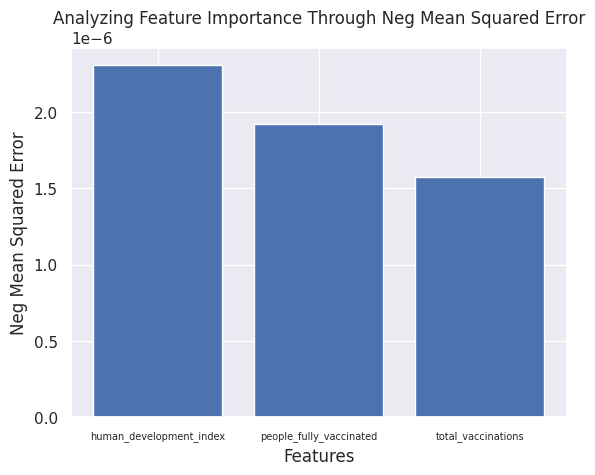

In [29]:
# Evaluate and plot the importance of all features of interest when using a knn model:

# gets importance of the features when using a knn model
results = permutation_importance(knn_model, X_test, y_test, scoring='neg_mean_squared_error') 
importance = results.importances_mean 

# summarize feature importance 
for i,v in enumerate(importance): 
    print(f'Feature: {i}, Score: {v:.2e}') 

# plots and displays the importance of each feature when using a knn model in a bar graph 
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')

bars = ['human_development_index', 'people_fully_vaccinated', 'total_vaccinations']
y_pos = np.arange(len(bars))

plt.xticks(y_pos, bars, fontsize=7)
plt.ylabel('Neg Mean Squared Error')
plt.title('Analyzing Feature Importance Through Neg Mean Squared Error')
plt.show() 

Since a KNN Regression model does not have a mean decrease in impurity score, we can determine the relative importance of our features by comparing their neg_mean_squared_error scores between one another. Similar to the last model, we see the HDI playing the most significant role, with the next being the people fully vaccinated followed by the total rate of vaccinations. Compared to the last model, we see that the rate of people fully vaccinated plays a relatively stronger role than the total rate of vaccinations, which could lead to explaining why this model scores slightly better. The finding we can potentially draw is that in a more accurate model, vaccination rates play a stronger role, meaning that they are as important as we believe them to be.

<h4> Decision Tree </h4>

In [24]:
# Hyperparameter tuning with decision tree model:

# instantiates a decision tree regressor object and a dictionary representing the parameter settings of interest with hyperparameter tuning
regressor = DecisionTreeRegressor()
param_grid = { 
        'max_depth' : list(range(1, 10)),
        'min_samples_split' : list(range(2, 10)),
        'min_samples_leaf' : list(range(1, 5))
    }

# finds the best grid through the cross_validate function defined above and determines the best parameter combinations used for the grid
best_grid = cross_validate(regressor, param_grid)
best_params = best_grid.best_params_

# displays the combination of the best parameters and the best score
print("The most optimal hyperparamter combination is:", best_params)
print("The best score associated with this model is", round(best_grid.best_score_, 2))

The most optimal hyperparamter combination is: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
The best score associated with this model is 0.61


In [25]:
# Create a decision tree model:

# instantiates a decision tree model using the optimal hyperparameter combination and trains it with the training set
regressor = DecisionTreeRegressor(random_state = 6, max_depth=best_params['max_depth'], \
                        min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf']) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=6)

In [26]:
# Evaluate the Predictions:

# determines and displays the score of the decision tree model when using the testing set
dt_score = regressor.score(X_test, y_test)
print(f'The score of the model is {round(dt_score, 2)}')

The score of the model is 0.59


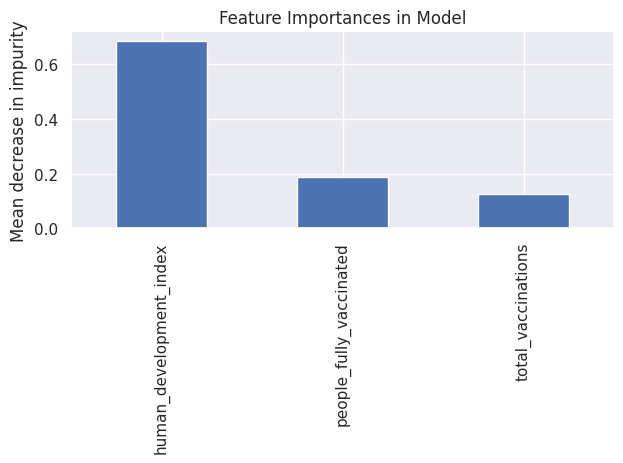

In [27]:
# visualize the feature importance for each feature of interest for the decision tree model using the plotFeatures function
plotFeatures(regressor)

Analyzing the feature importances of the Decision Tree model, we see that like the previous two models, the HDI plays the most significant role, then the rate of people fully vaccinated, and lastly the rate of total vaccinations. As we found in looking through the previous model's feature importance graph, the finding of a more accurate model putting more emphasis on vaccination rates could be suggested through this model as well, since the mean decrease in purity for vaccination features is on average less than in the first model, which was more accurate.

<h2> Determining Chosen Model </h2>

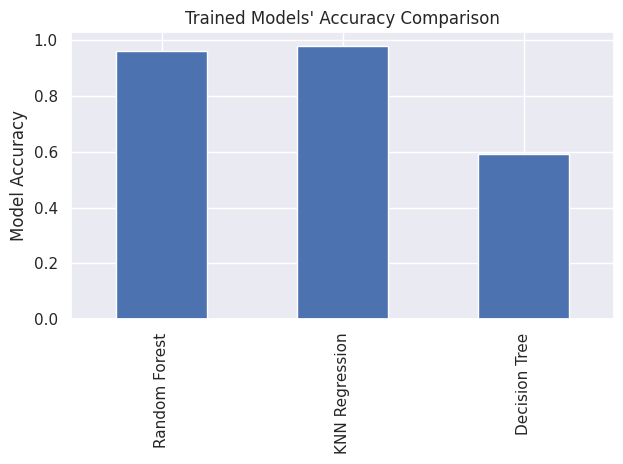

In [28]:
# Determine what model is best:

# creates a list of the scores for each of the three models above
accurracies = [rf_score, score_knn, dt_score]
model_importances = pd.Series(accurracies, index=['Random Forest', 'KNN Regression', 'Decision Tree'])

# displays a bar chart plot representing the accuracy levels of each of the models we built
fig, ax = plt.subplots()   
model_importances.plot.bar(ax=ax)
ax.set_title("Trained Models' Accuracy Comparison")
ax.set_ylabel("Model Accuracy")
fig.tight_layout()
plt.show()

From the above graph, as well as the accuracies calculated of each model, we come to the conclusion that both the Random Forest and KNN Regression models performed extremely well in predicting death rates off of our chosen features and accompanied with cross-validation.

When comparing relative accuracies, we see that the Decision Tree performed the worst, most likely due to the fact that Decision Trees are best for classification or when tackling discrete issues; and in our case we are dealing with continuous data in the form of death rates.

We expected Random Forest to perform well, as it is geared to dealing with models that are accompanied by several external variables, which is similar to our situation as death rates carry several external factors aside from our chosen features.

The KNN model surprised us in how well it performed, as we assumed it would perform the worst due to our large data set, but it was able to handle the training data well and when tuning the hyperparameters, performed the best.

As a result, we will go forth with the KNN Regression model in predicting death rates, and can do so with a high accuracy simply from a country's development index as well as the vaccination rates for those that have received one dose as well as both doses. 

Regarding our actual question we aim to address, which is how important vaccination rates play in determining the death rates, we will use both the Random Forest and KNN Regression models to draw our results from as they were able to predict death rates the best. In our presentation, we discuss our findings.